# Yearly Cannabis Use Change by Gender and Age Group: 2017 to 2022

Limitations
- population was rounded to the nearest 1000, so values may be slightly off
- not all users/non-users are captured in these surveys; survey responses were voluntary 
- 2023 survey data not available yet 

In [36]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [3]:
filepath = Path("Resources/cannabisdataset.csv")
data_file_df = pd.read_csv(filepath, encoding="utf-8")

In [4]:
data_file_df

,Year,Used - Females,Not Used - Females,Used - Males,Not Used - Males,Used - 16-19,Not Used - 16-19,Used - 20-24,Not Used - 20-24,Used - 25+,Not Used - 25+,Used - Overall Total,Not Used - Overall Total
0,2017,2589650,12208350,3656088,10351912,666231,954769,1002621,1240379,4607912,20435088,6272819,22634181
1,2018,2447456,11458544,3887550,10782450,591665,1029335,982434,1260566,4733127,20309873,6330414,22575586
2,2019,3072087,11768913,4021732,10040268,718103,902897,1150659,1092341,5233987,19809013,7111122,21795878
3,2020,3473262,11369738,4317341,9745659,705135,1063376,1177575,1065425,5910148,19132852,7775983,21131017
4,2021,3280303,11562697,4022018,10040982,594907,1024472,1090098,1152902,5609632,19433368,7284564,21622436
5,2022,3863574,11778426,4434210,10495790,591008,1014992,1105404,1096596,6610461,20152539,8315584,22256416


In [5]:
reindexed_df = data_file_df.set_index("Year")
reindexed_df["Total"] = reindexed_df["Used - Overall Total"] + reindexed_df["Not Used - Overall Total"]
reindexed_df

,Used - Females,Not Used - Females,Used - Males,Not Used - Males,Used - 16-19,Not Used - 16-19,Used - 20-24,Not Used - 20-24,Used - 25+,Not Used - 25+,Used - Overall Total,Not Used - Overall Total,Total
Year,,,,,,,,,,,,,
2017,2589650,12208350,3656088,10351912,666231,954769,1002621,1240379,4607912,20435088,6272819,22634181,28907000
2018,2447456,11458544,3887550,10782450,591665,1029335,982434,1260566,4733127,20309873,6330414,22575586,28906000
2019,3072087,11768913,4021732,10040268,718103,902897,1150659,1092341,5233987,19809013,7111122,21795878,28907000
2020,3473262,11369738,4317341,9745659,705135,1063376,1177575,1065425,5910148,19132852,7775983,21131017,28907000
2021,3280303,11562697,4022018,10040982,594907,1024472,1090098,1152902,5609632,19433368,7284564,21622436,28907000
2022,3863574,11778426,4434210,10495790,591008,1014992,1105404,1096596,6610461,20152539,8315584,22256416,30572000


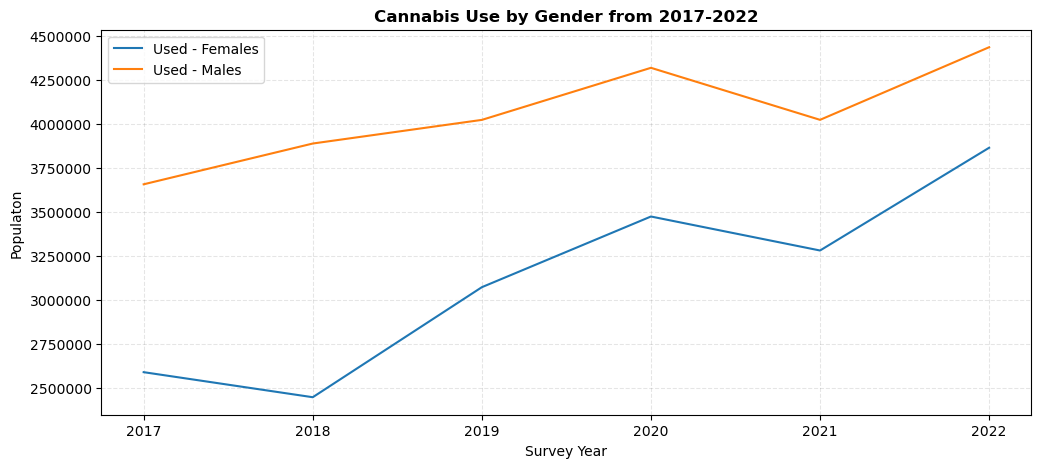

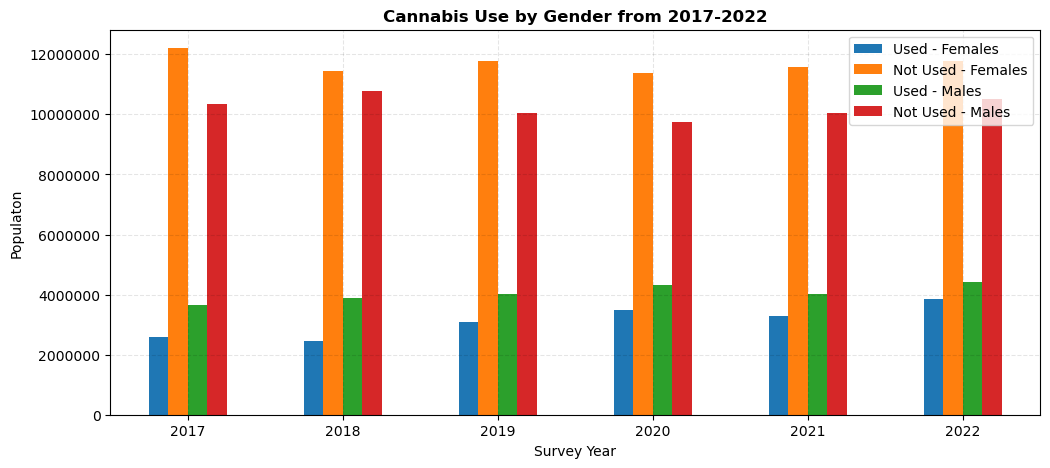

In [6]:
gender_line_plot = reindexed_df[["Used - Females", "Used - Males"]]

# Use DataFrame.plot() in order to create a bar chart of the data
gender_line_plot.plot(kind="line", figsize=(12,5))
plt.grid(color = 'black', linestyle = '--', alpha=0.1)
plt.xlabel("Survey Year")
plt.ylabel("Populaton")
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 10000))
plt.legend(loc="best")
plt.title("Cannabis Use by Gender from 2017-2022", fontweight = "bold")


gender_bar_plot = reindexed_df[["Used - Females", "Not Used - Females", "Used - Males", "Not Used - Males"]]
plot = gender_bar_plot.plot(kind="bar", figsize=(12,5), rot = 0)
plt.grid(color = 'black', linestyle = '--', alpha=0.1)
plt.title("Cannabis Use by Gender from 2017-2022", fontweight = "bold")
plt.xlabel("Survey Year")
plt.ylabel("Populaton")
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 10000))

plt.legend(loc="best")

<Axes: title={'center': '2022'}>

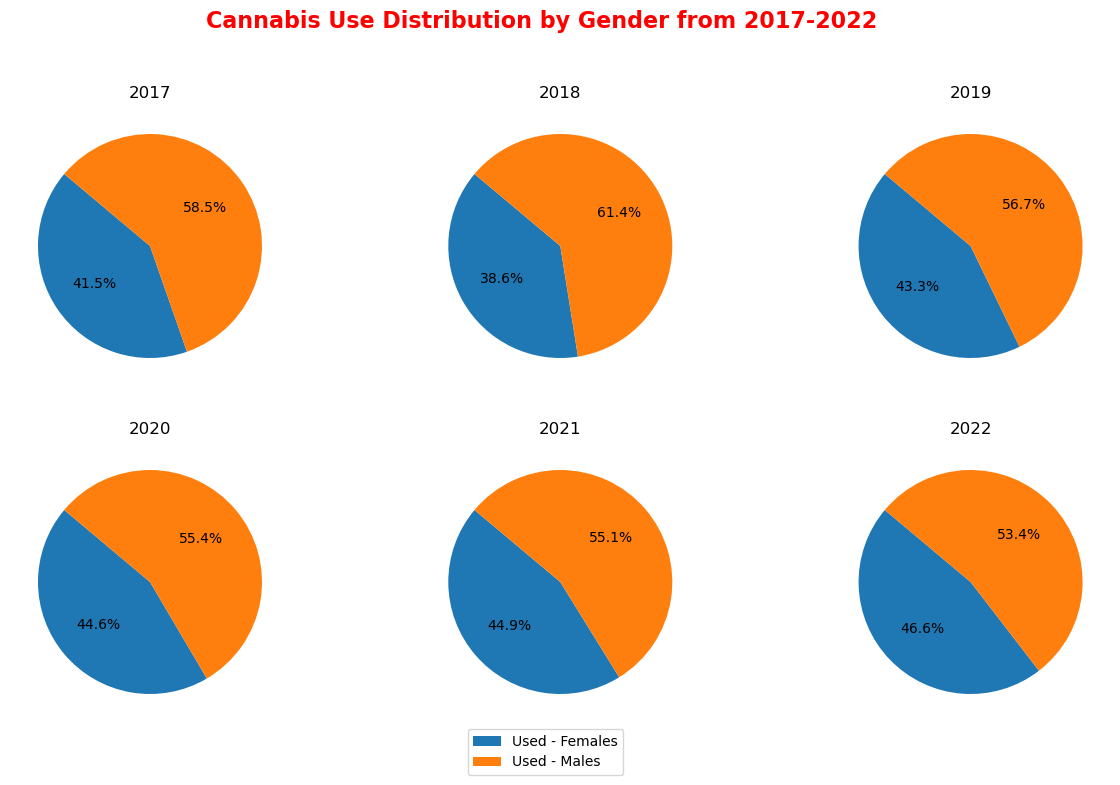

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(15,8)
fig.suptitle('Cannabis Use Distribution by Gender from 2017-2022', fontsize=16, y = 1, color = "red", fontweight="bold") 
gender_pie_plot = reindexed_df[["Used - Females", "Used - Males"]]
pie_2017_df = gender_pie_plot.iloc[0, :]
pie_2018_df = gender_pie_plot.iloc[1, :]
pie_2019_df = gender_pie_plot.iloc[2, :]
pie_2020_df = gender_pie_plot.iloc[3, :]
pie_2021_df = gender_pie_plot.iloc[4, :]
pie_2022_df = gender_pie_plot.iloc[5, :]

pie_2017_df.plot.pie(ax=axes[0,0], autopct="%1.1f%%", startangle=140,  ylabel = '', labeldistance=None, legend = False, title = "2017")
pie_2018_df.plot.pie(ax=axes[0,1], autopct="%1.1f%%", startangle=140,   ylabel = '', labeldistance=None, legend = False, title = "2018")
pie_2019_df.plot.pie(ax=axes[0,2], autopct="%1.1f%%", startangle=140,   ylabel = '', labeldistance=None, legend = False, title = "2019")
pie_2020_df.plot.pie(ax=axes[1,0], autopct="%1.1f%%", startangle=140,  ylabel = '', labeldistance=None, legend = False, title = "2020")
ax1 = pie_2021_df.plot.pie(ax=axes[1,1], autopct="%1.1f%%", startangle=140,  ylabel = '', labeldistance=None, legend = True, title = "2021")
ax1.get_legend().set_bbox_to_anchor((0.75,0))
pie_2022_df.plot.pie(ax=axes[1,2], autopct="%1.1f%%", startangle=140,   ylabel = '', labeldistance=None, legend = False, title = "2022")


In [9]:
reindexed_df

,Used - Females,Not Used - Females,Used - Males,Not Used - Males,Used - 16-19,Not Used - 16-19,Used - 20-24,Not Used - 20-24,Used - 25+,Not Used - 25+,Used - Overall Total,Not Used - Overall Total,Total
Year,,,,,,,,,,,,,
2017,2589650,12208350,3656088,10351912,666231,954769,1002621,1240379,4607912,20435088,6272819,22634181,28907000
2018,2447456,11458544,3887550,10782450,591665,1029335,982434,1260566,4733127,20309873,6330414,22575586,28906000
2019,3072087,11768913,4021732,10040268,718103,902897,1150659,1092341,5233987,19809013,7111122,21795878,28907000
2020,3473262,11369738,4317341,9745659,705135,1063376,1177575,1065425,5910148,19132852,7775983,21131017,28907000
2021,3280303,11562697,4022018,10040982,594907,1024472,1090098,1152902,5609632,19433368,7284564,21622436,28907000
2022,3863574,11778426,4434210,10495790,591008,1014992,1105404,1096596,6610461,20152539,8315584,22256416,30572000


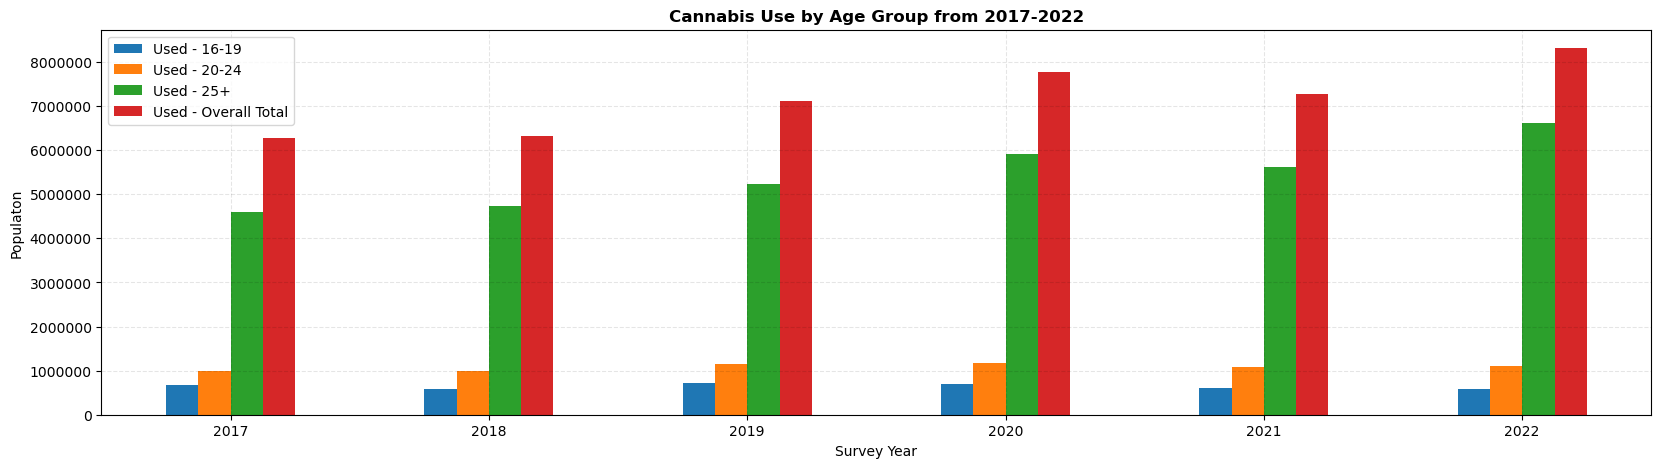

In [10]:
age_bar_plot = reindexed_df[["Used - 16-19","Used - 20-24", "Used - 25+", "Used - Overall Total"]]

plot = age_bar_plot.plot(kind="bar", figsize=(20,5), rot = 0)
plt.grid(color = 'black', linestyle = '--', alpha=0.1)
plt.title("Cannabis Use by Age Group from 2017-2022", fontweight = "bold")
plt.xlabel("Survey Year")
plt.ylabel("Populaton")
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 10000))

plt.legend(loc="best")


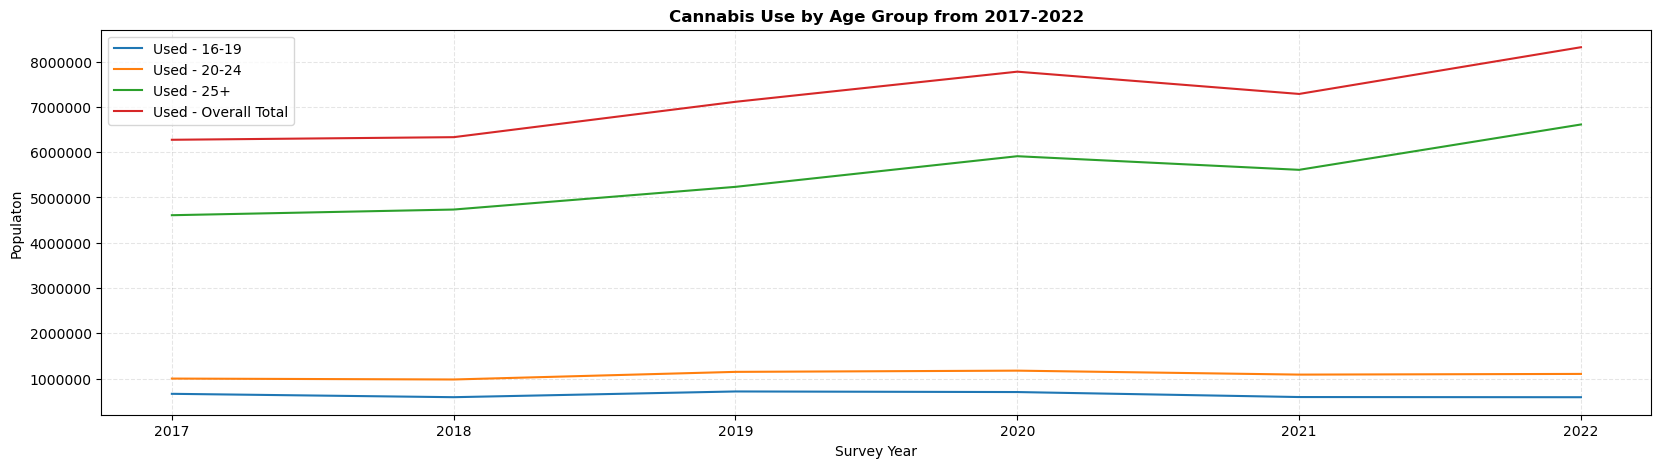

In [11]:
age_line_plot = reindexed_df[["Used - 16-19","Used - 20-24", "Used - 25+", "Used - Overall Total"]]

plot = age_line_plot.plot(kind="line", figsize=(20,5), rot = 0)
plt.grid(color = 'black', linestyle = '--', alpha=0.1)
plt.title("Cannabis Use by Age Group from 2017-2022", fontweight = "bold")
plt.xlabel("Survey Year")
plt.ylabel("Populaton")
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 10000))

plt.legend(loc="best")


# Cannabis Use Change during Firsts Wave of the Covid Pandemic Analyzed by Gender, Age Group, and Income Level (May 2020 to March 2021)

In [12]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [13]:
covidfilepath = Path("Resources\CannabisCovidPandemicSurvey.csv")
covid_datafile_df = pd.read_csv(covidfilepath, encoding="utf-8")
covid_datafile_df.columns

Index(['respid', 'prov', 'hregion', 'Age_groups', 'hage', 'hgender',
       'hhousehold', 'hchildren', 'living_area', 'educ', 'marital_stat',
       'racial_grp', 'Income', 'more_cannabis', 'same_cannabis',
       'less_cannabis', 'canabis_change', 'more_alcohol', 'same_alcohol',
       'less_alcohol', 'alcohol_change', 'halc_cat', 'can_cat',
       'HED heavy episodic drinking', 'feltdepressed', 'notdepressed',
       'feltlonely', 'notlonely', 'felthopeful', 'nothopeful',
       'anxiety_modsev', 'notanxious', 'rarely_depr', 'little_depr',
       'mod_depress', 'sev_depress', 'rarely_alone', 'little_lonely',
       'mod_lonely', 'sev_lonely', 'low_anxiety', 'mod_anxiety',
       'sev_anxiety'],
      dtype='object')

In [14]:
covid_datafile_df.dtypes

respid                           int64
prov                            object
hregion                         object
Age_groups                      object
hage                            object
hgender                         object
hhousehold                      object
hchildren                       object
living_area                     object
educ                            object
marital_stat                    object
racial_grp                      object
Income                          object
more_cannabis                  float64
same_cannabis                  float64
less_cannabis                  float64
canabis_change                 float64
more_alcohol                   float64
same_alcohol                   float64
less_alcohol                   float64
alcohol_change                 float64
halc_cat                        object
can_cat                         object
HED heavy episodic drinking      int64
feltdepressed                    int64
notdepressed             

In [15]:
covid_datafile_df.head()

,respid,prov,hregion,Age_groups,hage,hgender,hhousehold,hchildren,living_area,educ,...,little_depr,mod_depress,sev_depress,rarely_alone,little_lonely,mod_lonely,sev_lonely,low_anxiety,mod_anxiety,sev_anxiety
0,6870,Nova Scotia,QC/ATL,18 to 29 years,18-39,Male,Live with others,No Kids,Suburban area,University degree/diploma,...,0,0,0,1,0,0,0,0,0,0
1,6069,Ontario,ON,18 to 29 years,18-39,Female,Live with others,No Kids,Urban area,University degree/diploma,...,0,1,0,0,0,1,0,1,0,0
2,1904,Ontario,ON,30 to 39 years,18-39,Female,Live with others,No Kids,Urban area,University degree/diploma,...,1,0,0,1,0,0,0,1,0,0
3,1279,British Columbia,BC,30 to 39 years,18-39,Male,Live with others,Kids,Urban area,University degree/diploma,...,0,1,0,0,0,0,1,1,0,0
4,2623,Saskatchewan,SK/MN,70 years and over,60+,Male,Live with others,No Kids,Urban area,University degree/diploma,...,0,0,0,1,0,0,0,0,0,0


In [16]:
cannabis_analysis_df = covid_datafile_df[["respid", "Age_groups", "hgender", "racial_grp", "Income", "can_cat", "more_cannabis", "same_cannabis", "less_cannabis", "canabis_change"]]
cannabis_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6016 entries, 0 to 6015
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   respid          6016 non-null   int64  
 1   Age_groups      6016 non-null   object 
 2   hgender         6016 non-null   object 
 3   racial_grp      5857 non-null   object 
 4   Income          6016 non-null   object 
 5   can_cat         6012 non-null   object 
 6   more_cannabis   5748 non-null   float64
 7   same_cannabis   5748 non-null   float64
 8   less_cannabis   5748 non-null   float64
 9   canabis_change  5748 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 470.1+ KB


In [17]:
# Fill NAs for columns 
cannabis_analysis_df = cannabis_analysis_df.fillna({"can_cat": "no","racial_grp":'Not Specified',"more_cannabis": 0, "same_cannabis": 1, "less_cannabis": 0, "canabis_change": 3})
cannabis_analysis_df = cannabis_analysis_df.rename(columns={"can_cat":"Prepandemic_cannabis_use"})
cannabis_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6016 entries, 0 to 6015
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   respid                    6016 non-null   int64  
 1   Age_groups                6016 non-null   object 
 2   hgender                   6016 non-null   object 
 3   racial_grp                6016 non-null   object 
 4   Income                    6016 non-null   object 
 5   Prepandemic_cannabis_use  6016 non-null   object 
 6   more_cannabis             6016 non-null   float64
 7   same_cannabis             6016 non-null   float64
 8   less_cannabis             6016 non-null   float64
 9   canabis_change            6016 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 470.1+ KB


In [18]:
def get_cannabis_change(rating):
    if rating == 1:
        return '1. A lot less'
    elif rating == 2:
        return '2. A little less'
    elif rating == 3:
        return '3. The same'
    elif rating == 4:
        return '4. A little more'
    elif rating == 5:
        return '5. A lot more'


In [19]:
cannabis_analysis_df['Cannabis_Use_Change'] =  cannabis_analysis_df["canabis_change"].apply(get_cannabis_change)
cannabis_analysis_df = cannabis_analysis_df[["respid", "Age_groups", "hgender", "racial_grp", "Income", "Prepandemic_cannabis_use", "Cannabis_Use_Change"]]
cannabis_analysis_df.head()

,respid,Age_groups,hgender,racial_grp,Income,Prepandemic_cannabis_use,Cannabis_Use_Change
0,6870,18 to 29 years,Male,White,Income missing,no,3. The same
1,6069,18 to 29 years,Female,Asian,40-79k,no,2. A little less
2,1904,30 to 39 years,Female,White,Over 120k,no,3. The same
3,1279,30 to 39 years,Male,Not Specified,Income missing,no,3. The same
4,2623,70 years and over,Male,White,80-119k,no,3. The same


In [44]:
change_only_df = cannabis_analysis_df.loc[(cannabis_analysis_df["Cannabis_Use_Change"] == "1. A lot less") | (cannabis_analysis_df["Cannabis_Use_Change"] == "2. A little less")| (cannabis_analysis_df["Cannabis_Use_Change"] == "4. A little more") | (cannabis_analysis_df["Cannabis_Use_Change"] == "5. A lot more"), :]
change_only_df

,respid,Age_groups,hgender,racial_grp,Income,Prepandemic_cannabis_use,Cannabis_Use_Change
1,6069,18 to 29 years,Female,Asian,40-79k,no,2. A little less
5,4804,30 to 39 years,Male,Black/Indigenous/Arab/latinos,40-79k,yes,1. A lot less
19,2415,18 to 29 years,Female,White,80-119k,yes,5. A lot more
21,3006,30 to 39 years,Male,White,80-119k,yes,2. A little less
22,999,40 to 49 years,Male,Asian,Over 120k,no,5. A lot more
...,...,...,...,...,...,...,...
6001,2559,60 to 69 years,Female,White,40-79k,yes,4. A little more
6004,124539,30 to 39 years,Male,White,Over 120k,yes,5. A lot more
6005,371,30 to 39 years,Male,White,Over 120k,no,1. A lot less
6007,92408,30 to 39 years,Female,Black/Indigenous/Arab/latinos,40-79k,yes,4. A little more


## Cannabis Use Change by Age Group

In [21]:
age_group_df = cannabis_analysis_df.groupby(["Age_groups", "Cannabis_Use_Change"]).count().unstack()
age_group_df = age_group_df[["respid"]]
age_group_df

respid                               \
Cannabis_Use_Change 1. A lot less 2. A little less 3. The same   
Age_groups                                                       
18 to 29 years                 19               27         597   
30 to 39 years                 35               31        1370   
40 to 49 years                 17               20         772   
50 to 59 years                  7               13         900   
60 to 69 years                 10               17        1052   
70 years and over               5               12         702   

                                                    
Cannabis_Use_Change 4. A little more 5. A lot more  
Age_groups                                          
18 to 29 years                    51            32  
30 to 39 years                   123            58  
40 to 49 years                    43            19  
50 to 59 years                    37            14  
60 to 69 years                    21             7  
70 years and over                  3             2

Text(0, 0.5, 'Number of People')

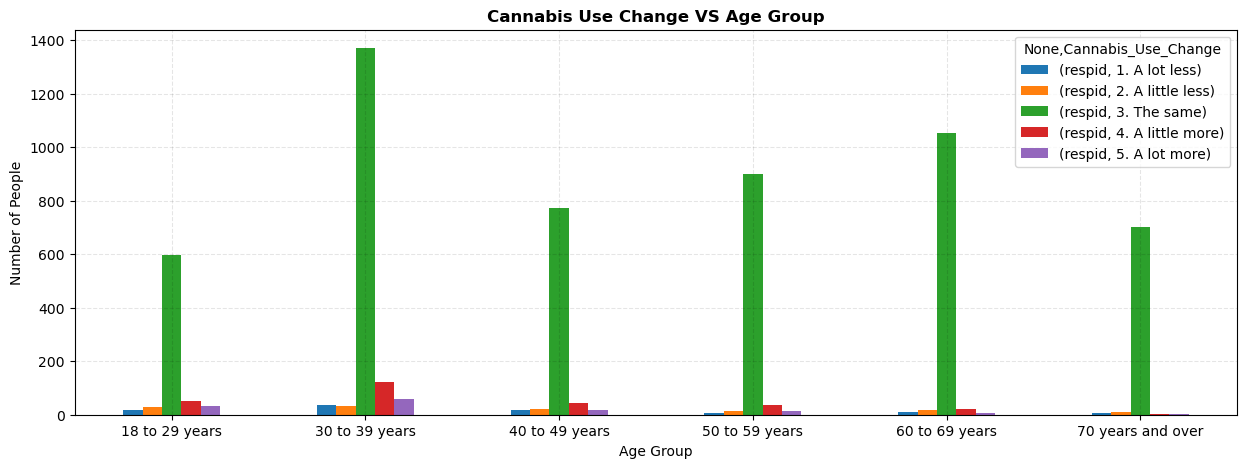

In [22]:
age_group_df.plot(kind="bar", figsize=(15,5), rot = 0)
plt.grid(color = 'black', linestyle = '--', alpha=0.1)
plt.title("Cannabis Use Change VS Age Group", fontweight = "bold")
plt.xlabel("Age Group")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

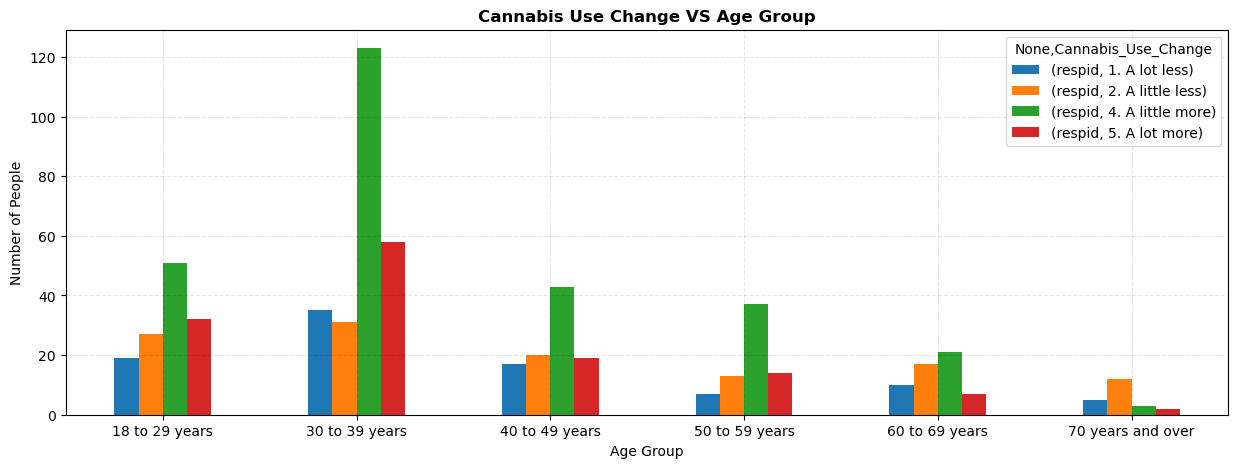

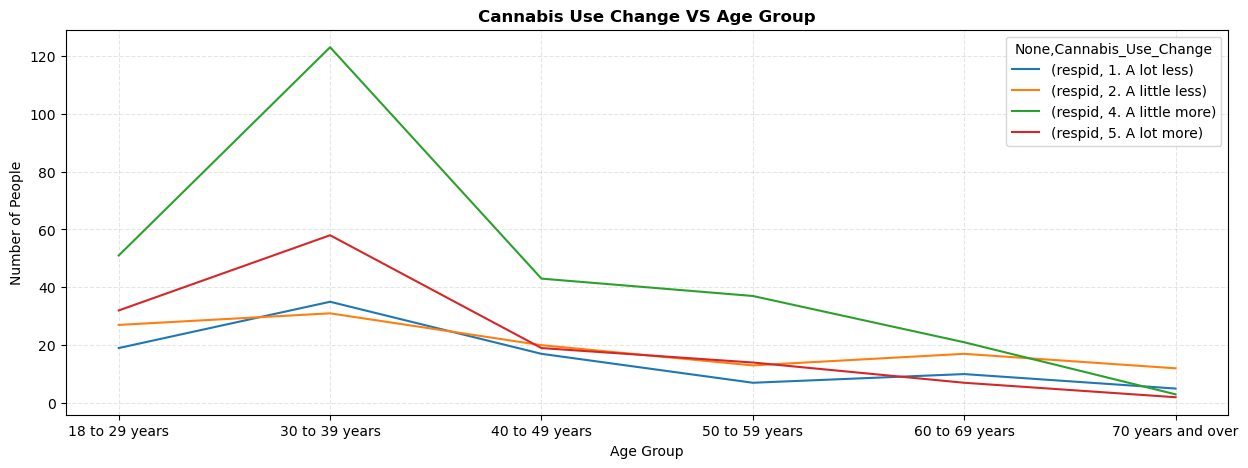

In [23]:
age_group_df2 = change_only_df.groupby(["Age_groups", "Cannabis_Use_Change"]).count().unstack()
age_group_df2 = age_group_df2[["respid"]]
age_group_df2.plot(kind="bar", figsize=(15,5), rot = 0)
plt.grid(color = 'black', linestyle = '--', alpha=0.1)
plt.title("Cannabis Use Change VS Age Group", fontweight = "bold")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
age_group_df2.plot(kind="line", figsize=(15,5))
plt.grid(color = 'black', linestyle = '--', alpha=0.1)
plt.title("Cannabis Use Change VS Age Group", fontweight = "bold")
plt.xlabel("Age Group")
plt.ylabel("Number of People")

<Axes: title={'center': '70 years and over'}>

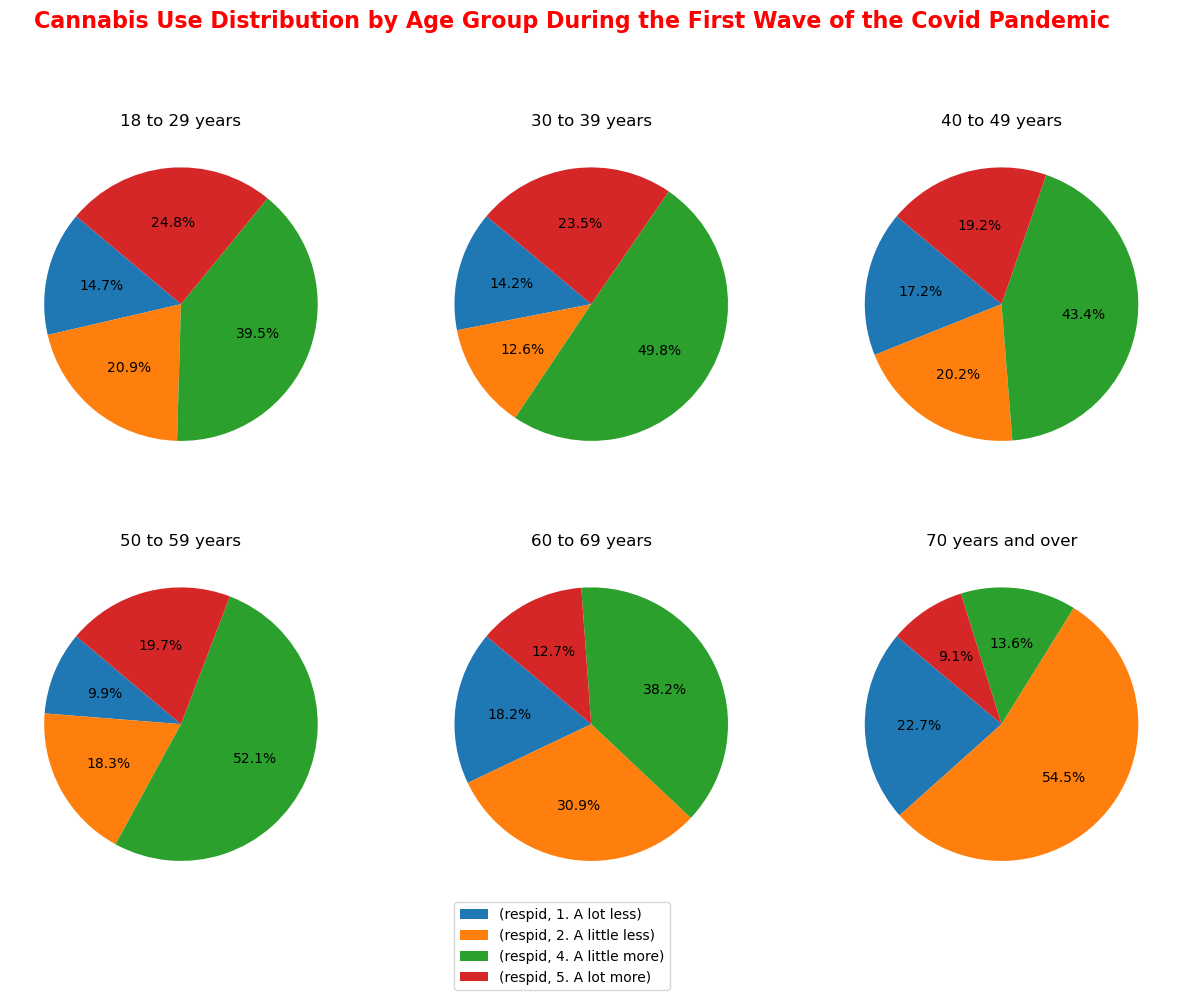

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(15,10)
fig.suptitle('Cannabis Use Distribution by Age Group During the First Wave of the Covid Pandemic', fontsize=16, y = 1, color = "red", fontweight="bold") 

age_group_base_df = change_only_df[["Age_groups", "Cannabis_Use_Change","respid"]]

agegroup1_df = age_group_base_df.loc[(age_group_base_df["Age_groups"] == "18 to 29 years"), :]
agegroup1_df = agegroup1_df.groupby(["Age_groups", "Cannabis_Use_Change"]).count().unstack()
agegroup1_df = agegroup1_df.iloc[0, :]
agegroup1_df.plot.pie(ax=axes[0,0], autopct="%1.1f%%", startangle=140, ylabel = '', labeldistance=None, legend = False, title = "18 to 29 years")

agegroup2_df = age_group_base_df.loc[(age_group_base_df["Age_groups"] == "30 to 39 years"), :]
agegroup2_df = agegroup2_df.groupby(["Age_groups", "Cannabis_Use_Change"]).count().unstack()
agegroup2_df = agegroup2_df.iloc[0, :]
agegroup2_df.plot.pie(ax=axes[0,1], autopct="%1.1f%%", startangle=140, ylabel = '', labeldistance=None, legend = False, title = "30 to 39 years")

agegroup3_df = age_group_base_df.loc[(age_group_base_df["Age_groups"] == "40 to 49 years"), :]
agegroup3_df = agegroup3_df.groupby(["Age_groups", "Cannabis_Use_Change"]).count().unstack()
agegroup3_df = agegroup3_df.iloc[0, :]
agegroup3_df.plot.pie(ax=axes[0,2], autopct="%1.1f%%", startangle=140, ylabel = '', labeldistance=None, legend = False, title = "40 to 49 years")

agegroup4_df = age_group_base_df.loc[(age_group_base_df["Age_groups"] == "50 to 59 years"), :]
agegroup4_df = agegroup4_df.groupby(["Age_groups", "Cannabis_Use_Change"]).count().unstack()
agegroup4_df = agegroup4_df.iloc[0, :]
agegroup4_df.plot.pie(ax=axes[1,0], autopct="%1.1f%%", startangle=140, ylabel = '', labeldistance=None, legend = False, title = "50 to 59 years")

agegroup5_df = age_group_base_df.loc[(age_group_base_df["Age_groups"] == "60 to 69 years"), :]
agegroup5_df = agegroup5_df.groupby(["Age_groups", "Cannabis_Use_Change"]).count().unstack()
agegroup5_df = agegroup5_df.iloc[0, :]
ax2 = agegroup5_df.plot.pie(ax=axes[1,1], autopct="%1.1f%%", startangle=140, ylabel = '', labeldistance=None, legend = True, title = "60 to 69 years")
ax2.get_legend().set_bbox_to_anchor((0.75,0))

agegroup6_df = age_group_base_df.loc[(age_group_base_df["Age_groups"] == "70 years and over"), :]
agegroup6_df = agegroup6_df.groupby(["Age_groups", "Cannabis_Use_Change"]).count().unstack()
agegroup6_df = agegroup6_df.iloc[0, :]
agegroup6_df.plot.pie(ax=axes[1,2], autopct="%1.1f%%", startangle=140, ylabel = '', labeldistance=None, legend = False, title = "70 years and over")



In [25]:
agegroup1_df

        Cannabis_Use_Change
respid  1. A lot less          19
        2. A little less       27
        4. A little more       51
        5. A lot more          32
Name: 18 to 29 years, dtype: int64

## Cannabis Use Change by Gender

In [45]:
gender = CategoricalDtype(['Male', 'Female', 'Other'], ordered=True)
change_only_df['hgender'] = change_only_df['hgender'].astype(gender)
change_only_df.sort_values(by='hgender')

C:\Users\Ajunjee Selvam\AppData\Local\Temp\ipykernel_18124\3396208807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  change_only_df['hgender'] = change_only_df['hgender'].astype(gender)


,respid,Age_groups,hgender,racial_grp,Income,Prepandemic_cannabis_use,Cannabis_Use_Change
3360,4732,50 to 59 years,Male,White,Over 120k,yes,4. A little more
5043,6382,40 to 49 years,Male,Black/Indigenous/Arab/latinos,80-119k,yes,5. A lot more
5051,650,40 to 49 years,Male,Asian,Over 120k,yes,2. A little less
5062,4337,60 to 69 years,Male,White,40-79k,yes,4. A little more
5082,4564,30 to 39 years,Male,Black/Indigenous/Arab/latinos,Over 120k,yes,4. A little more
...,...,...,...,...,...,...,...
2989,1521,70 years and over,Other,White,Over 120k,yes,5. A lot more
5127,6801,50 to 59 years,Other,Asian,Over 120k,yes,5. A lot more
3134,4453,30 to 39 years,Other,Asian,40-79k,yes,4. A little more
5091,4012,30 to 39 years,Other,Black/Indigenous/Arab/latinos,80-119k,yes,5. A lot more


In [46]:
gender_df = cannabis_analysis_df.groupby(["hgender", "Cannabis_Use_Change"]).count().unstack()
gender_df = gender_df[["respid"]]
gender_df

respid                               \
Cannabis_Use_Change 1. A lot less 2. A little less 3. The same   
hgender                                                          
Female                         44               47        2718   
Male                           48               72        2637   
Other                           1                1          38   

                                                    
Cannabis_Use_Change 4. A little more 5. A lot more  
hgender                                             
Female                           113            62  
Male                             159            64  
Other                              6             6

C:\Users\Ajunjee Selvam\AppData\Local\Temp\ipykernel_18124\767327687.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_df2 = change_only_df.groupby(["hgender", "Cannabis_Use_Change"]).count().unstack()


Text(0, 0.5, 'Number of People')

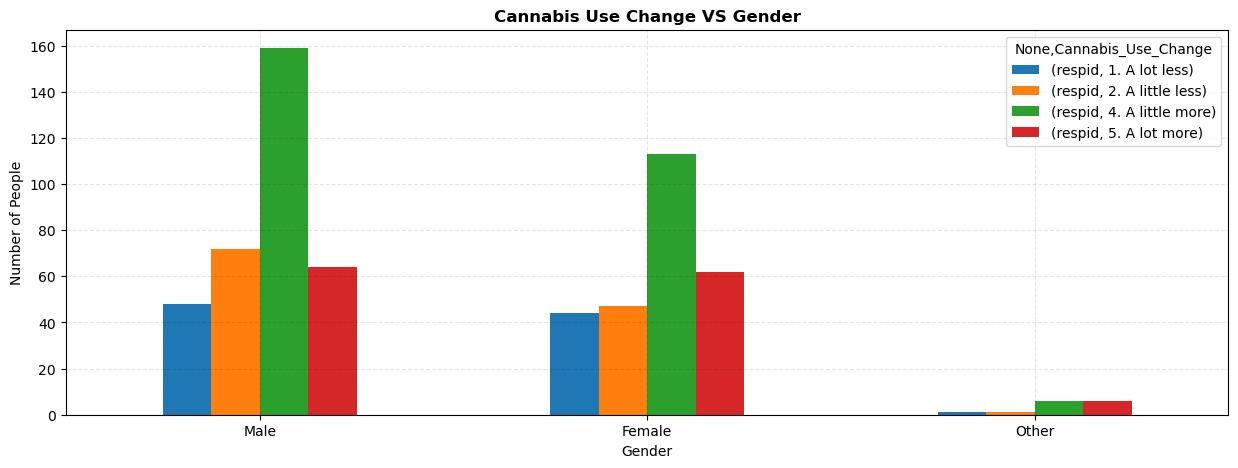

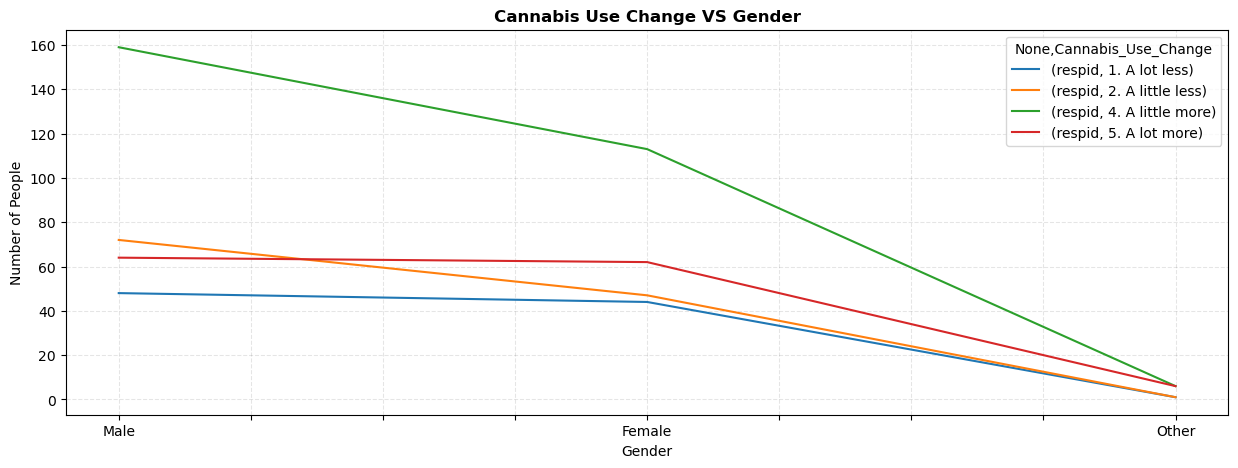

In [47]:
gender_df2 = change_only_df.groupby(["hgender", "Cannabis_Use_Change"]).count().unstack()

gender_df2 = gender_df2[["respid"]]

gender_df2.plot(kind="bar", figsize=(15,5), rot = 0)
plt.title("Cannabis Use Change VS Gender", fontweight = "bold")
plt.grid(color = 'black', linestyle = '--', alpha=0.1)
plt.xlabel("Gender")
plt.ylabel("Number of People")

gender_df2.plot(kind="line", figsize=(15,5))
plt.title("Cannabis Use Change VS Gender", fontweight = "bold")
plt.grid(color = 'black', linestyle = '--', alpha=0.1)

plt.xlabel("Gender")
plt.ylabel("Number of People")

## Cannabis Use Change by Ethnicity

In [48]:
race = CategoricalDtype(['Asian', 'Black/Indigenous/Arab/latinos', 'White', 'Other', 'Not Specified'], ordered=True)
change_only_df['racial_grp'] = change_only_df['racial_grp'].astype(race)
change_only_df.sort_values(by='racial_grp')

C:\Users\Ajunjee Selvam\AppData\Local\Temp\ipykernel_18124\708656896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  change_only_df['racial_grp'] = change_only_df['racial_grp'].astype(race)


,respid,Age_groups,hgender,racial_grp,Income,Prepandemic_cannabis_use,Cannabis_Use_Change
1,6069,18 to 29 years,Female,Asian,40-79k,no,2. A little less
2672,6484,30 to 39 years,Male,Asian,40-79k,yes,5. A lot more
1085,2803,40 to 49 years,Male,Asian,40-79k,yes,4. A little more
2666,5271,30 to 39 years,Male,Asian,80-119k,no,1. A lot less
2661,3916,30 to 39 years,Male,Asian,Over 120k,no,2. A little less
...,...,...,...,...,...,...,...
5970,106887,30 to 39 years,Female,Not Specified,Income missing,yes,4. A little more
576,3680,40 to 49 years,Female,Not Specified,Income missing,yes,1. A lot less
5835,6237,50 to 59 years,Female,Not Specified,Less than 40k,yes,4. A little more
501,3333,18 to 29 years,Male,Not Specified,40-79k,yes,4. A little more


In [49]:
ethnicity_df = cannabis_analysis_df.groupby(["racial_grp", "Cannabis_Use_Change"]).count().unstack()
ethnicity_df = ethnicity_df[["respid"]]
ethnicity_df

respid                               \
Cannabis_Use_Change           1. A lot less 2. A little less 3. The same   
racial_grp                                                                 
Asian                                    22               14         995   
Black/Indigenous/Arab/latinos            10               17         359   
Not Specified                             2                1         149   
Other                                     4                6         110   
White                                    55               82        3780   

                                                              
Cannabis_Use_Change           4. A little more 5. A lot more  
racial_grp                                                    
Asian                                       59            28  
Black/Indigenous/Arab/latinos               34            18  
Not Specified                                5             2  
Other                                        7             4  
White                                      173            80

C:\Users\Ajunjee Selvam\AppData\Local\Temp\ipykernel_18124\1468379335.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ethnicity_df2 = change_only_df.groupby(["racial_grp", "Cannabis_Use_Change"]).count().unstack()


Text(0, 0.5, 'Number of People')

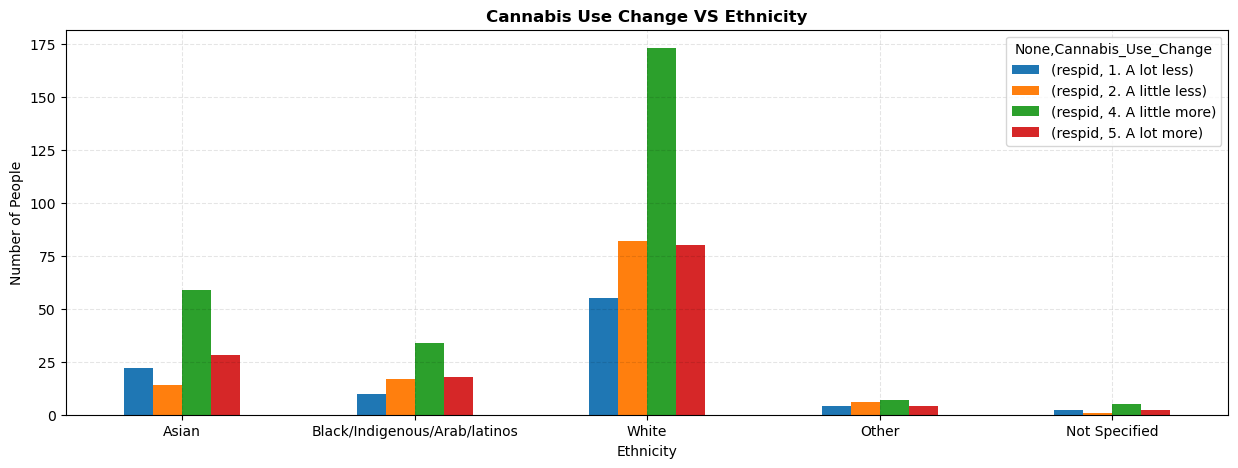

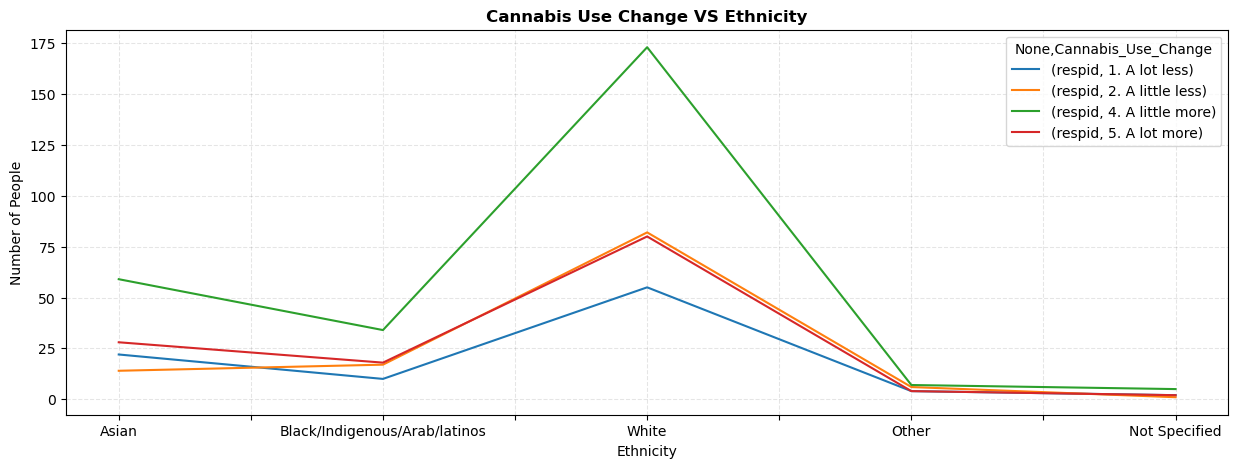

In [50]:
ethnicity_df2 = change_only_df.groupby(["racial_grp", "Cannabis_Use_Change"]).count().unstack()
ethnicity_df2 = ethnicity_df2[["respid"]]

ethnicity_df2.plot(kind="bar", figsize=(15,5), rot = 0)
plt.title("Cannabis Use Change VS Ethnicity", fontweight = "bold")
plt.grid(color = 'black', linestyle = '--', alpha=0.1)
plt.xlabel("Ethnicity")
plt.ylabel("Number of People")

ethnicity_df2.plot(kind="line", figsize=(15,5))
plt.title("Cannabis Use Change VS Ethnicity", fontweight = "bold")
plt.grid(color = 'black', linestyle = '--', alpha=0.1)

plt.xlabel("Ethnicity")
plt.ylabel("Number of People")

## Cannabis Use Change by Income Level

In [51]:
income = CategoricalDtype(['Less than 40k','40-79k', '80-119k', 'Over 120k','Income missing' ], ordered=True)
change_only_df['Income'] = change_only_df['Income'].astype(income)
change_only_df.sort_values(by='Income')

C:\Users\Ajunjee Selvam\AppData\Local\Temp\ipykernel_18124\383115877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  change_only_df['Income'] = change_only_df['Income'].astype(income)


,respid,Age_groups,hgender,racial_grp,Income,Prepandemic_cannabis_use,Cannabis_Use_Change
1108,1594,18 to 29 years,Male,White,Less than 40k,yes,1. A lot less
1776,2154,60 to 69 years,Male,Black/Indigenous/Arab/latinos,Less than 40k,yes,4. A little more
3897,5438,40 to 49 years,Other,White,Less than 40k,yes,5. A lot more
2848,9696,60 to 69 years,Female,White,Less than 40k,no,1. A lot less
2834,2250,18 to 29 years,Female,Other,Less than 40k,yes,1. A lot less
...,...,...,...,...,...,...,...
1340,6134,30 to 39 years,Male,White,Income missing,yes,4. A little more
1334,5955,40 to 49 years,Female,Not Specified,Income missing,yes,1. A lot less
1265,4096,18 to 29 years,Female,White,Income missing,yes,5. A lot more
5201,1917,30 to 39 years,Male,Asian,Income missing,no,2. A little less


In [52]:
income_df = cannabis_analysis_df.groupby(["Income", "Cannabis_Use_Change"]).count().unstack()
income_df = income_df[["respid"]]
income_df

respid                               \
Cannabis_Use_Change 1. A lot less 2. A little less 3. The same   
Income                                                           
40-79k                         16               32        1281   
80-119k                        24               30        1202   
Income missing                 12                8         939   
Less than 40k                  21               21         623   
Over 120k                      20               29        1348   

                                                    
Cannabis_Use_Change 4. A little more 5. A lot more  
Income                                              
40-79k                            80            37  
80-119k                           79            42  
Income missing                    16             4  
Less than 40k                     41            19  
Over 120k                         62            30

C:\Users\Ajunjee Selvam\AppData\Local\Temp\ipykernel_18124\2363911954.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_df2 = change_only_df.groupby(["Income", "Cannabis_Use_Change"]).count().unstack()


Text(0, 0.5, 'Number of People')

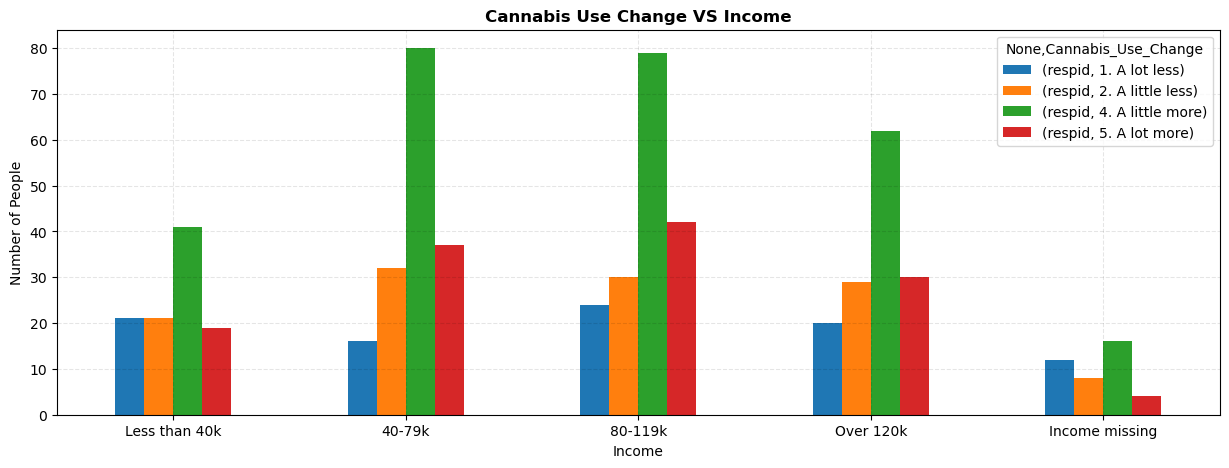

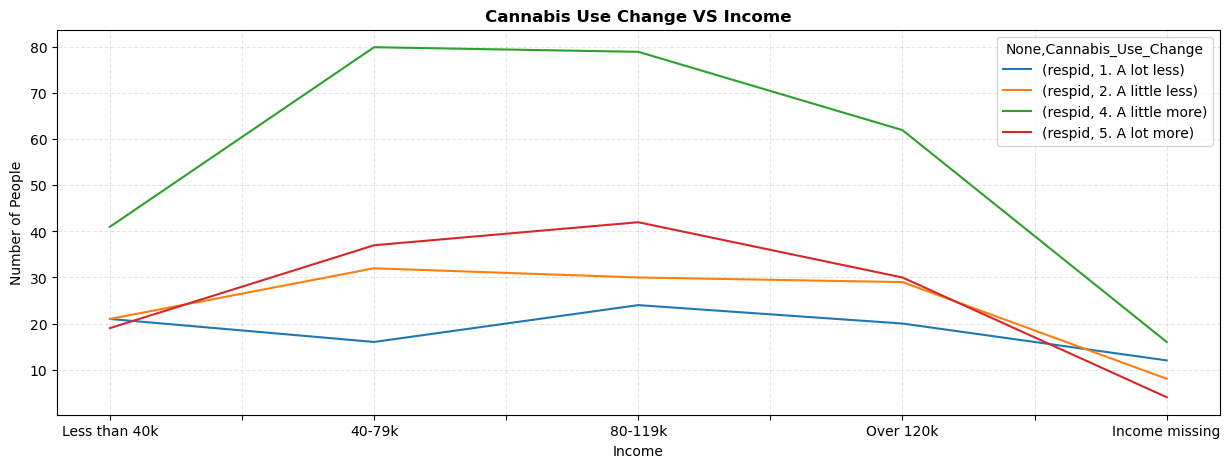

In [53]:
income_df2 = change_only_df.groupby(["Income", "Cannabis_Use_Change"]).count().unstack()
income_df2 = income_df2[["respid"]]

income_df2.plot(kind="bar", figsize=(15,5), rot = 0)
plt.title("Cannabis Use Change VS Income", fontweight = "bold")
plt.grid(color = 'black', linestyle = '--', alpha=0.1)
plt.xlabel("Income")
plt.ylabel("Number of People")

income_df2.plot(kind="line", figsize=(15,5))
plt.title("Cannabis Use Change VS Income", fontweight = "bold")
plt.grid(color = 'black', linestyle = '--', alpha=0.1)
plt.xlabel("Income")
plt.ylabel("Number of People")